# [5SSD0] Programming in Julia

This assignment will teach you some of the basic programming routines in Julia. You will need these skills to complete the probabilistic programming assignments later on in the course. We will assume basic familiarity with programming, such as for-loops, if-else statements and function definitions.

Resources:
- [Julia documentation](https://docs.julialang.org/en/v1/)
- [Differences to Python, Matlab, C and Java](https://docs.julialang.org/en/v1/manual/noteworthy-differences/)
- [Video on getting started](https://www.youtube.com/watch?v=4igzy3bGVkQ&list=PLP8iPy9hna6SCcFv3FvY_qjAmtTsNYHQE)

## Data types and structures

- References: [Numbers](https://docs.julialang.org/en/v1/base/numbers/), [Integers and Float](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/), [Strings](https://docs.julialang.org/en/v1/base/strings/).

Numbers in Julia have specific types, most notably `Integer`, `Real` and `Complex`. It is important to be aware of what type your numbers are because many functions operate differently on different number types. 

In [ ]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

In [1]:
a = 3
typeof(a)

Int64

`Int64` is a 64-byte integer. Other options are 32-,16-, or 8-bit integers and they can be unsigned as well. The default real-valued numbers is a 64-bit floating-point number:

In [2]:
a = 3.0
typeof(a)

Float64

Converting number types is easy:

In [3]:
a = convert(Float64, 2)
typeof(a)

Float64

---

<b> Exercise </b>

What is the type of an integer times a real-valued number? 

In [45]:
### BEGIN SOLUTION
T = typeof(2*2.0)
### END SOLUTION

Float64

In [5]:
### BEGIN HIDDEN TESTS
@assert IJulia.ans <: Real
### END HIDDEN TESTS

---

Strings are constructed by enclosing symbols within double parentheses.

In [6]:
a = "3"
typeof(a)

String

They can be concatenated by multiplication (which is an example of a function, namely `*`, which acts differently on different input argument types): 

In [7]:
ab = "a"*"b"

"ab"

You can incorporate numbers into strings through a `$` call:

In [8]:
"a = $a"

"a = 3"

## Array manipulation

- References: [Arrays](https://docs.julialang.org/en/v1/base/arrays/)

Arrays are indexed with square brackets, `A[i,j]`. You can construct a matrix by enclosing a set of numbers with square brackets. If you separate your numbers with comma's, then you will get a column vector:

In [9]:
x = [1,2,3,4]

4-element Vector{Int64}:
 1
 2
 3
 4

If you use spaces, then you will construct a row vector (i.e., a matrix of dimensions 1 by n):

In [10]:
x = [1 2 3 4]

1×4 Matrix{Int64}:
 1  2  3  4

Matrices can be constructed by separating elements with spaces and rows by semicolons:

In [11]:
X = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

Common array constructors are:

In [12]:
X = zeros(2,3)
Y = ones(2,3)
Z = randn(2,3)

2×3 Matrix{Float64}:
  0.951876  -1.24456   -0.859818
 -0.844609  -0.321822   0.291833

---

<b> Exercise </b>

Define a variable $X$ of type `Matrix`.

In [13]:
### BEGIN SOLUTION
X = [3 4 5; 6 7 8]
### END SOLUTION

2×3 Matrix{Int64}:
 3  4  5
 6  7  8

In [14]:
### BEGIN HIDDEN TESTS
@assert typeof(X) <: Matrix
### END HIDDEN TESTS

---

Matrix operations are intuitive and similar to the mathematical notation:

In [15]:
A = [3 2 1; 2 3 2; 1 2 3]
x = [0, 1, 2]
b = A*x

3-element Vector{Int64}:
 4
 7
 8

A matrix can be transposed by a single parenthesis, `A'`. Note that this does not mutate the array in memory. It just tells functions defined for matrices that it should change how it indexes the matrix's elements.

In [16]:
c = x'*A*x

23

---

<b> Exercise </b>

Calculate the outer product of the matrix $A$ (defined above) with itself.

In [17]:
### BEGIN SOLUTION
A*A'
### END SOLUTION

3×3 Matrix{Int64}:
 14  14  10
 14  17  14
 10  14  14

In [18]:
### BEGIN HIDDEN TESTS
@assert IJulia.ans ==  [14  14  10; 14  17  14; 10  14  14]
### END HIDDEN TESTS

---

## Broadcasting

- Reference: [Broadcasting](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting)

You can apply functions to elements in an array by placing a dot in front:

In [19]:
 3 .*[1 2 3]

1×3 Matrix{Int64}:
 3  6  9

This also works for named functions:

In [20]:
sin.([1., 2., 3.])

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

---

<b> Exercise </b>

Broadcast the exponential function (`exp`) to each element in the following matrix.

In [21]:
X = [-1 -2 -3; 
      3  2  1]
### BEGIN SOLUTION
exp.(X)
### END SOLUTION

2×3 Matrix{Float64}:
  0.367879  0.135335  0.0497871
 20.0855    7.38906   2.71828

In [22]:
### BEGIN HIDDEN TESTS
@assert sum(abs.(IJulia.ans - [ 0.367879  0.135335  0.0497871; 20.0855    7.38906   2.71828  ])) < 1e-3
### END HIDDEN TESTS

---

## Iteration

- Reference: [Collections](https://docs.julialang.org/en/v1/base/collections/)

For-loops are one of the simplest forms of iteration and can be defined in a number of ways. First, the matlab way:

In [23]:
for n = 1:2:5
    println(n)
end

1
3
5


Next, we can use the `range` command to construct an array of numbers and then use the `in` command to loop over elements in the array:

In [24]:
num_range = range(0, stop=4, length=2)
for n in num_range
    println(n)
end

0.0
4.0


If you need both the index and the value of the array element, you can use the `enumerate` command:

In [25]:
for (j,n) in enumerate(num_range)
    println("$j, $n")
end

1, 0.0
2, 4.0


You may be familiar with "list comprehension", which is a shortened form of iterating through a collection:

In [26]:
["n = $n" for n in num_range]

2-element Vector{String}:
 "n = 0.0"
 "n = 4.0"

---

<b> Exercise </b>

Iterate over the elements of the following matrix and multiply them with their row and column index (i.e., `x_ij*i*j`). Return the sum of these multiplications.

In [27]:
X = [1 2 3; 4 5 6]
### BEGIN SOLUTION
N,M = size(X)
result = 0.0
for i in 1:N
    for j in 1:M
        result += X[i,j]*i*j
    end
end
result
### END SOLUTION

78.0

In [28]:
### BEGIN HIDDEN TESTS
@assert IJulia.ans == 78.0
### END HIDDEN TESTS

---

## Control flow

- References: [Control flow](https://docs.julialang.org/en/v1/manual/control-flow/), [Logical Operators](https://docs.julialang.org/en/v1/manual/missing/#Logical-operators)

Control flow refers to redirecting how a compiler goes through a program. Instead of traversing it line-by-line, things like `if-else` statements can make a compiler skip steps. These require logical operations: you can use `==` to check if two variables have the same value, `===` to check if they are actually the same object (i.e., same memory reference) and `!=` to check if they're not equal.

In [29]:
a = 3.0
if a < 0 
    println("Negative")
elseif a == 0
    println("0.0")
else 
    println("Positive")
end

Positive


Simple `if-else` statements can often be replaced by `ternary` checks. Essentially, you ask a question (a logical operation followed by `?`) and then tell the program what to do when the answer is yes (written immediately after the question) or no (written after the yes-answer followed by a `:`).

In [30]:
a > 0 ? println("Positive") : println("Not positive")

Positive


---

<b> Exercise </b>

Write a procedure to check if the given vector is sorted in increasing order.

In [31]:
x = [1 2 3 2]

### BEGIN SOLUTION
answer = "yes"
for n = 2:length(x)
    if x[n] < x[n-1]
        answer = "no"
    end
end
answer
### END SOLUTION

"no"

In [32]:
### BEGIN HIDDEN TESTS
@assert IJulia.ans == "no"
### END HIDDEN TESTS

---

## Functions

- References: [Functions](https://docs.julialang.org/en/v1/manual/functions/), [Mutation](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention)

Function and expressions are a core component of the julia language. Its "multiple dispatch" feature means that you can define multiple functions with the same name but with behaviour that depends on the input argument types. When you're starting out, you may not notice this so much, but you will start to appreciate this feature tremendously when you begin to professionally develop software.

In [33]:
function foo(bar::Float64)
    message = "Boo!"
    return message
end

function foo(bar::Integer)
    message = "Bah!"
    return message
end

foo(1)

"Bah!"

Note that the `return` argument does not need to be at the end of a function ([the return keyword](https://docs.julialang.org/en/v1/manual/functions/#The-return-Keyword)).

You don't actually need the `function` keyword if you have simple enough functions:

In [34]:
fn(x::Number) = 1/x
fn(4)

0.25

You can add keyword arguments to a function, which are input arguments with default values:

In [35]:
fn(; number::Number = 1) = 1/number
[fn() fn(number=3)]

1×2 Matrix{Float64}:
 1.0  0.333333

Functions that modify their input arguments instead of creating new output variables are typically marked with an `!`. Below I have defined an unsorted vector and I call `sort` to sort it in increasing order. If I call the sort function and the original vector, then they will be different:

In [36]:
x = [1, 3, 2]
[sort(x) x]

3×2 Matrix{Int64}:
 1  1
 2  3
 3  2

But if I call the `sort!` function and the original vector, you'll see that the original vector is now also sorted.

In [37]:
[sort!(x) x]

3×2 Matrix{Int64}:
 1  1
 2  2
 3  3

---

<b> Exercise </b>

Write a function `even()` that checks whether the given numbers are even (output argument should be of `BitMatrix` type).

In [38]:
### BEGIN SOLUTION
function even(x::Integer)
    iseven = false
    if rem(x,2) == 0
        iseven = true
    end
    return iseven
end
### END SOLUTION
check = even.([1 2 3])

1×3 BitMatrix:
 0  1  0

In [39]:
### BEGIN HIDDEN TESTS
@assert check == BitArray([0 1 0])
### END HIDDEN TESTS

---

## Importing

- Reference: [Packages and modules](https://docs.julialang.org/en/v1/manual/faq/#Packages-and-Modules)

Just like with Python, there are thousands of additional software packages that can be imported to provide specific functionalities. You'll encounter some of the most common ones throughout the course. 

We have provided an "environment" that automatically downloads all the packages you need throughout the course. The three lines of code below point to the environment specification itself, a Project.toml file containing a list of packages, and construct the environment. If the specified packages are not installed, then these will be automatically added. This will take a bit of time the first time you run it, but it will only take a few seconds afterwards.

In [ ]:
using Pkg
Pkg.activate(".")
Pkg.instantiate();

Below are some examples of importing packages and using their added functionalities.

In [40]:
using LinearAlgebra

E,V = eigen([3. 2.;2. 0.4])

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -0.6853720883753125
  4.085372088375313
vectors:
2×2 Matrix{Float64}:
  0.476976  -0.878916
 -0.878916  -0.476976

In [41]:
using DataFrames

x = Dict(
    "a" => 1,
    "b" => 2,
    "c" => 3
)

df = DataFrame(x)

Row,a,b,c
,Int64,Int64,Int64
1,1,2,3


In [42]:
using Distributions

px = Normal(1.0, 0.5)
pdf(px, 0.0)

0.10798193302637613

## Visualization

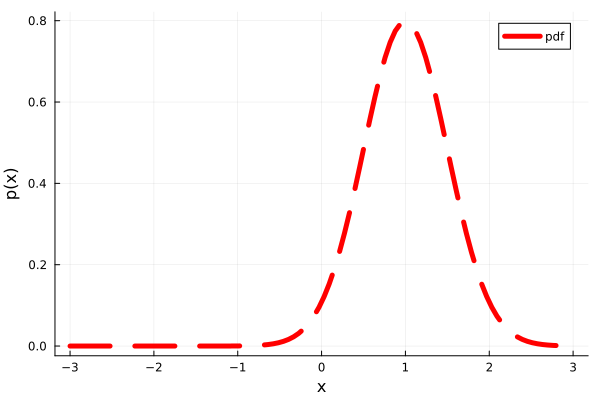

In [43]:
using Plots

x = range(-3, stop=3, length=100)
y = pdf.(px, x)
plot(x, y, xlabel="x", ylabel="p(x)", label="pdf", color="red", linewidth=5, linestyle=:dash)

## Macro's

- References: [Macros](https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros)

Words that start with the `@` symbol are "macro"'s in Julia, for example `@time, @test, @model`. They represent a series of functions called on an input structure and are really handy when you have to use the same set of instructions often. 

For example, you could define a `ProgressMeter` bar, update it at every iteration of a for-loop and write a custom print statement every time. _Or_, you could call the `@showprogress` macro on the for-loop itself:

In [44]:
using ProgressMeter

@showprogress for n in 1:10
    sleep(0.1)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


Macro's are a somewhat advanced form of metaprogramming. You will not need to define any new macro's; this instruction is just here to explain what they are.